In [14]:
import pandas as pd 
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('rMD17_Force.csv')

# Removing l=0,1,2 from NequIP and taking the best model with l=3
df.drop('NequIP(l=0)', axis=1, inplace=True)
df.drop('NequIP(l=1)', axis=1, inplace=True)
df.drop('NequIP(l=2)', axis=1, inplace=True)

df.head()

,rMD17_molecules,NequIP(l=3),MACE,Allegro,FCHL19,GAP(SOAP),sGDML,ACE,MGNN
0,Aspirin,0.189,0.152,0.168,0.482,1.035,0.733,0.413,0.210
1,Azobenzene,0.067,0.069,0.060,0.249,0.565,0.443,0.251,0.143
2,Benzene,0.007,0.007,0.005,0.060,0.138,0.018,0.012,0.005
3,Ethanol,0.065,0.048,0.048,0.143,0.417,0.369,0.168,0.062
4,Malonaldehyde,0.118,0.095,0.083,0.238,0.609,0.434,0.256,0.118


In [16]:
colors = {
    'SchNet':      '#1f77b4',  # muted blue
    'DimeNet':     '#d62728',  # safety orange
    'PhysNet':     '#8c6d31',  # cooked asparagus green
    'GemNet(Q)':   '#843c39',  # brick red
    'GemNet(T)':   '#8c564b',  # muted purple
    'PaiNN(F)':    '#5254a3',  # chestnut brown
    'PaiNN(F+E)':  '#7f7f7f',  # raspberry yogurt pink
    'ENINet':      '#e377c2',  # middle gray
    'SpookyNet':   '#bcbd22',  # curry yellow-green
    'NequIP(l=0)': '#2ca02c',  # blue-teal
    'NequIP(l=1)': '#393b79',  # dark muted blue
    'NequIP(l=2)': 'red',      # '637939',  # olive green
    'NequIP(l=3)': '#17becf',  # dark mustard
    'MACE':        '#ff7f0e',  # dark brick red
    'NewtonNet':   '#7b4173',  # dark purple
    'Allegro':     '#9467bd',  # soft blue
    'SO3krates':   '#6b6ecf',  # soft purple
    'FCHL19':      '#9c9ede',  # light lavender
    'GAP(SOAP)':   '#8ca252',  # light olive green
    'sGDML':       '#b5cf6b',  # pastel green
    'ACE':         'violet',   #
    'MGNN':        'black',    #
}

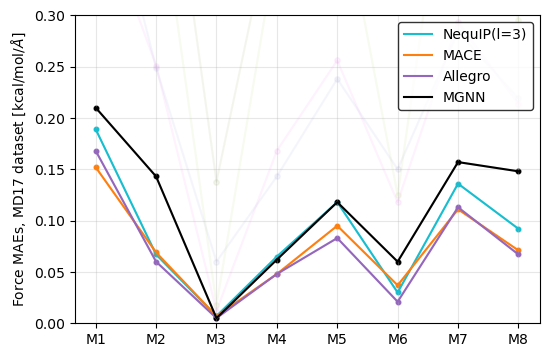

In [17]:
fig,ax = plt.subplots(figsize=(6,4))

x = [0,1,2,3,4,5,6,7]
mae_cutoff = 0.3 # kcal/mol/A


for i_col in range(1,len(df.columns)):

    column = df.iloc[:, i_col]        
    column_name = df.columns[i_col]   

    x_new = []
    y_new = []

    for i in range(len(x)):
        if column[i] != 'x': 
            x_new.append(x[i])
            y_new.append(float(column[i]))

    if all(y <= mae_cutoff for y in y_new):
        ax.plot(x_new,y_new,label=column_name,color=colors[column_name],alpha=1)
        ax.scatter(x_new,y_new,color=colors[column_name],s=10)
    if any(y <= mae_cutoff for y in y_new):
        ax.plot(x_new,y_new,color=colors[column_name],alpha=0.1)
        ax.scatter(x_new,y_new,color=colors[column_name],s=15,alpha=0.1)


ax.set_ylim([0,mae_cutoff])

ax.set_xticks([0,1,2,3,4,5,6,7])
ax.set_xticklabels(['M1','M2','M3','M4','M5','M6','M7','M8'])

ax.set_ylabel('Force MAEs, MD17 dataset [kcal/mol/$\\AA$]')

ax.legend(edgecolor='black',facecolor='white',loc='upper right')
ax.grid(alpha=0.3)
plt.show()